<a href="https://colab.research.google.com/github/BehrangEbrahimi13/Repo_Paper_01/blob/main/paper01_with_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-6-ce9d290ff9fb>:29: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for feature2, correlation in row.iteritems():


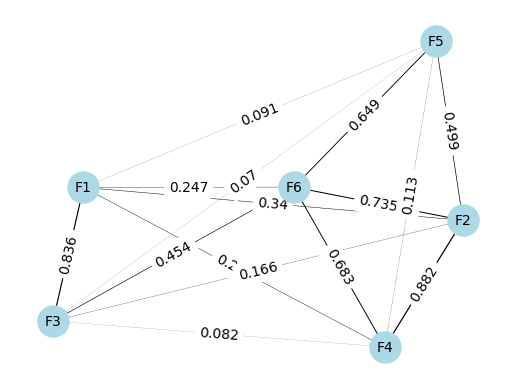

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Example dataset with features
data = {
    'F1': [1, 2, 3, 4, 5],
    'F2': [2, 24, 6, 50, 10],
    'F3': [25, 3, 15, 4, -25],
    'F4': [7, 4, 9, 78, 0],
    'F5': [16, -11, 6, 3, 12],
    'F6': [1, 3, 2, 4, -1]
}

# Create a pandas DataFrame from the dataset
df = pd.DataFrame(data)

# Calculate the correlation matrix
corr_matrix = df.corr().round(3).abs()

# Create a graph
G = nx.Graph()

# Add nodes (features) to the graph
G.add_nodes_from(corr_matrix.columns)

# Iterate over the correlation matrix and add edges (correlations) to the graph
for feature1, row in corr_matrix.iterrows():
    for feature2, correlation in row.iteritems():
        if feature1 != feature2:
            G.add_edge(feature1, feature2, weight=correlation)

# Draw the graph
pos = nx.spring_layout(G)
labels = {node: node for node in G.nodes()}
weights = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_labels(G, pos, labels, font_size=10)
nx.draw_networkx_edges(G, pos, width=list(weights.values()))
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
plt.axis('off')
plt.show()

The Louvain algorithm is a popular method for community detection in networks. It is an iterative algorithm that aims to optimize the modularity of the network by iteratively merging and reassigning nodes to communities. The modularity is a measure of the quality of the division of a network into communities, with higher values indicating better community structure.

Here's a step-by-step explanation of the Louvain algorithm:

Initialization: Start by assigning each node to its own separate community.

1. Phase 1: Iterate through each node and consider moving it to its neighboring community. Compute the change in modularity that would result from moving the node to a neighboring community.

2. Phase 2: After considering all nodes in Phase 1, merge the communities that have been identified in Phase 1, treating each community as a single node. Construct a new network where the nodes represent the merged communities.

3. Repeat Phases 1 and 2 until no more improvement in modularity is possible or a predefined stopping criterion is met.

4. Output: Return the final division of nodes into communities, which represents the optimal community structure according to the modularity measure.

<ipython-input-18-25c179403216>:31: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for feature2, correlation in row.iteritems():


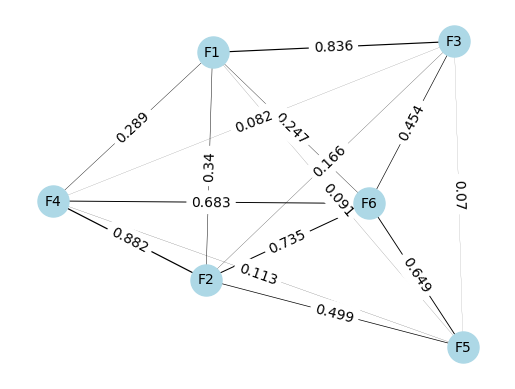

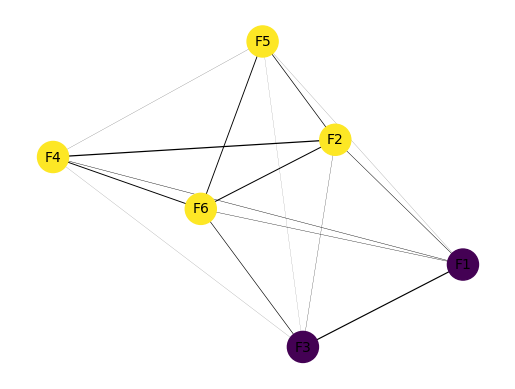

F1 : 1.803
F2 : 2.622
F3 : 1.608
F4 : 2.0490000000000004
F5 : 1.422
F6 : 2.768
Community: 0, Best Node: F1
Community: 1, Best Node: F6


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from community import community_louvain


# Example dataset with features
data = {
    'F1': [1, 2, 3, 4, 5],
    'F2': [2, 24, 6, 50, 10],
    'F3': [25, 3, 15, 4, -25],
    'F4': [7, 4, 9, 78, 0],
    'F5': [16, -11, 6, 3, 12],
    'F6': [1, 3, 2, 4, -1]
}

# Create a pandas DataFrame from the dataset
df = pd.DataFrame(data)

# Calculate the correlation matrix
corr_matrix = df.corr().round(3).abs()

# Create a graph
G = nx.Graph()

# Add nodes (features) to the graph
G.add_nodes_from(corr_matrix.columns)

# Iterate over the correlation matrix and add edges (correlations) to the graph
for feature1, row in corr_matrix.iterrows():
    for feature2, correlation in row.iteritems():
        if feature1 != feature2:
            G.add_edge(feature1, feature2, weight=correlation)

# Draw the graph
pos = nx.spring_layout(G)
labels = {node: node for node in G.nodes()}
weights = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_labels(G, pos, labels, font_size=10)
nx.draw_networkx_edges(G, pos, width=list(weights.values()))
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
plt.axis('off')
plt.show()

# در اینجا برای انتخاب بهتر جامعه شاید بهتر باشد بر اساس یک معیاری مشخص کنیم که یالهای با چه وزن هایی کمتر حذف شود.
# Apply the Louvain algorithm for community detection
partition = community_louvain.best_partition(G)

# Draw the graph with node colors based on community
pos = nx.spring_layout(G)
labels = {node: node for node in G.nodes()}
nx.draw_networkx_nodes(G, pos, node_color=list(partition.values()), cmap='viridis', node_size=500)
nx.draw_networkx_labels(G, pos, labels, font_size=10)
nx.draw_networkx_edges(G, pos, width=list(weights.values()))
plt.axis('off')
plt.show()

# # Find the best node for each community
# best_nodes = {}
# for node, community_id in partition.items():
#     if community_id not in best_nodes:
#         best_nodes[community_id] = node
#     else:
#         current_best = best_nodes[community_id]
#         if G.degree[node] > G.degree[current_best]:
#             best_nodes[community_id] = node

#حال اگر اینجا از تجزیه طیفی استفاده کنیم چه؟ یعنی هر نود را یه عددی میدهیم
# و توی هر کامیونیتی اون نودی که بیشتری عدد را دارد انتخاب می کنیم.



#در اینجا ما آن نودی از کلاستر را انتخاب کردیم که بیشترین مجموع وزن را با دیگر اعضای کلاستر های دیگر دارد
#که شاید بهتر باشد، کمترین را حساب کنیم تا آن نکته که هر ویژگی متفاوت از دیگری باشد بهتر نشان داده شود.
# Find the best node for each community considering both weighted degree and edge weights
best_nodes = {}
for node, community_id in partition.items():
    node_score = G.degree(node, weight='weight')
    print(f"{node} : {node_score}")
    if community_id not in best_nodes:
        best_nodes[community_id] = node
    else:
        current_best = best_nodes[community_id]
        current_best_score = G.degree(current_best, weight='weight')
        new_score = G.degree(node, weight='weight')
        if new_score > current_best_score:
            best_nodes[community_id] = node

# Print the best node for each community
for community_id, best_node in best_nodes.items():
    print(f"Community: {community_id}, Best Node: {best_node}")

<ipython-input-116-d8c2549fe34e>:36: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for feature2, correlation in row.iteritems():


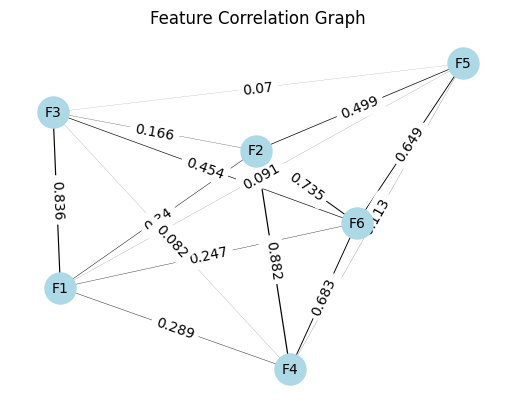

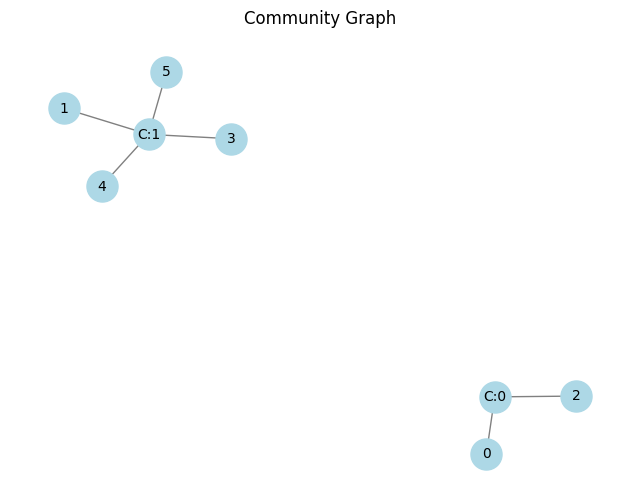

Community 0: Best Node0 = F1
Community 1: Best Node1 = F2


In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from community import community_louvain
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

# Example dataset with features
data = {
    'F1': [1, 2, 3, 4, 5],
    'F2': [2, 24, 6, 50, 10],
    'F3': [25, 3, 15, 4, -25],
    'F4': [7, 4, 9, 78, 0],
    'F5': [16, -11, 6, 3, 12],
    'F6': [1, 3, 2, 4, -1]
}

# Create a pandas DataFrame from the dataset
df = pd.DataFrame(data)

# Calculate the correlation matrix
corr_matrix = df.corr().round(3).abs()

# Create a graph
G = nx.Graph()

# Add feature nodes to the graph
for feature in corr_matrix.columns:
    G.add_node(feature, node_type='feature')

# # Add nodes (features) to the graph
# G.add_nodes_from(corr_matrix.columns)

# Iterate over the correlation matrix and add edges (correlations) to the graph
for feature1, row in corr_matrix.iterrows():
    for feature2, correlation in row.iteritems():
        if feature1 != feature2:
            G.add_edge(feature1, feature2, weight=correlation)

# Draw the graph
pos = nx.spring_layout(G)
labels = {node: node for node in G.nodes()}
weights = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_labels(G, pos, labels, font_size=10)
nx.draw_networkx_edges(G, pos, width=list(weights.values()))
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
plt.axis('off')
plt.title("Feature Correlation Graph")
plt.show()

# Find the optimal number of clusters using silhouette score
scores = []
for n_clusters in range(2, len(G.nodes)):
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='precomputed')
    labels = spectral.fit_predict(nx.to_numpy_array(G))
    score = silhouette_score(nx.to_numpy_array(G), labels)
    scores.append(score)

optimal_n_clusters = scores.index(max(scores)) + 2  # Add 2 because range starts from 2

# Perform spectral clustering for community detection with the optimal number of clusters
spectral = SpectralClustering(n_clusters=optimal_n_clusters, affinity='precomputed')
labels = spectral.fit_predict(nx.to_numpy_array(G))

# Create a new graph with the communities as nodes
community_graph = nx.Graph()
for i in range(len(labels)):
    community_graph.add_node(f"C:{labels[i]}")
    community_graph.add_edge(f"C:{labels[i]}", i)

# Find the best node to represent each community
best_nodes = {}
for node, label in enumerate(labels):
    if label not in best_nodes:
        best_nodes[label] = node

# Define the layout and labels for the graph
pos = nx.spring_layout(community_graph)
labels = {node: f"{node}" for node in community_graph.nodes()}

# Draw the community graph
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(community_graph, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_labels(community_graph, pos, labels, font_size=10)
nx.draw_networkx_edges(community_graph, pos, edge_color='gray')
plt.axis('off')
plt.title("Community Graph")
plt.show()

# Print the best node for each community
for community, node in best_nodes.items():
    print(f"Community {community}: Best Node{node} = F{node+1}")

<ipython-input-127-d4dc0dcd20d3>:33: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for feature2, correlation in row.iteritems():


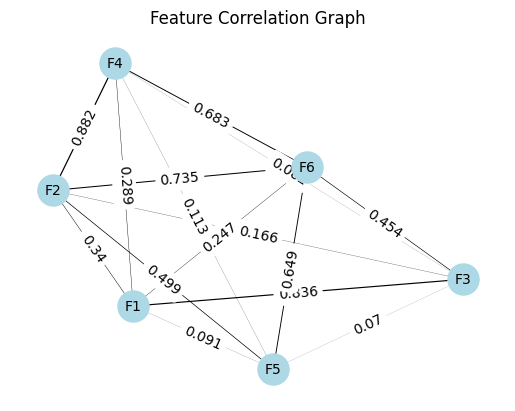

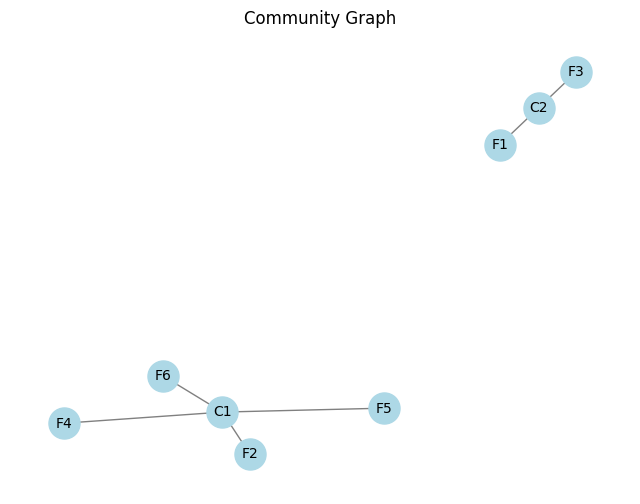

optimal_n_clusters = 2
Community C1: Best Feature F1
Community C2: Best Feature F2


In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import numpy as np

# Example dataset with features
data = {
    'F1': [1, 2, 3, 4, 5],
    'F2': [2, 24, 6, 50, 10],
    'F3': [25, 3, 15, 4, -25],
    'F4': [7, 4, 9, 78, 0],
    'F5': [16, -11, 6, 3, 12],
    'F6': [1, 3, 2, 4, -1]
}

# Create a pandas DataFrame from the dataset
df = pd.DataFrame(data)

# Calculate the correlation matrix
corr_matrix = df.corr().round(3).abs()

# Create a graph
G = nx.Graph()

# Add feature nodes to the graph
for feature in corr_matrix.columns:
    G.add_node(feature, node_type='feature')

# Iterate over the correlation matrix and add weighted edges (correlations) to the graph
for feature1, row in corr_matrix.iterrows():
    for feature2, correlation in row.iteritems():
        if feature1 != feature2:
            G.add_edge(feature1, feature2, weight=correlation)

# Draw the graph
pos = nx.spring_layout(G)
labels = {node: node for node in G.nodes()}
weights = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_labels(G, pos, labels, font_size=10)
nx.draw_networkx_edges(G, pos, width=list(weights.values()))
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
plt.axis('off')
plt.title("Feature Correlation Graph")
plt.show()


# Find the optimal number of clusters using silhouette score
scores = []
for n_clusters in range(2, len(G.nodes)):
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='precomputed')
    labels = spectral.fit_predict(nx.to_numpy_array(G))
    score = silhouette_score(nx.to_numpy_array(G), labels)
    scores.append(score)

optimal_n_clusters = scores.index(max(scores)) + 2  # Add 2 because range starts from 2

# Perform spectral clustering for community detection with the optimal number of clusters
spectral = SpectralClustering(n_clusters=optimal_n_clusters, affinity='precomputed')
labels = spectral.fit_predict(nx.to_numpy_array(G))

# Create a new graph with the communities as nodes
community_graph = nx.Graph()
for i in range(len(labels)):
    if i + 1  > optimal_n_clusters:
      break
    community_graph.add_node(f"C{i+1}")

# Add edges between feature nodes and community nodes
for feature, label in zip(G.nodes(), labels):
    if G.nodes[feature]['node_type'] == 'feature':
        community_graph.add_edge(f"C{label+1}", feature)

# Define the layout and labels for the community graph
pos = nx.spring_layout(community_graph)
labels = {node: node for node in community_graph.nodes()}

# Draw the community graph
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(community_graph, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_labels(community_graph, pos, labels, font_size=10)
nx.draw_networkx_edges(community_graph, pos, edge_color='gray')
plt.axis('off')
plt.title("Community Graph")
plt.show()

# Print the best feature for each community
i = 0
best_features = {}
for feature, label in zip(G.nodes(), labels):
    i += 1
    if i  > optimal_n_clusters:
      break
    if G.nodes[feature]['node_type'] == 'feature':
        if label not in best_features:
            best_features[label] = feature
        else:
            current_correlation = abs(corr_matrix[best_features[label]][feature])
            new_correlation = abs(corr_matrix[feature][feature])
            if new_correlation > current_correlation:
                best_features[label] = feature

print(f"optimal_n_clusters = {optimal_n_clusters}")

# Print the best feature for each community
for label, feature in best_features.items():
    print(f"Community {label}: Best Feature {feature}")

# Implementations for each of the community detection algorithms

Here are a few widely-used community detection algorithms that have shown good performance in various scenarios:

1. Louvain algorithm: The Louvain algorithm, explained earlier, is a fast and efficient method for community detection that optimizes modularity. It is known for its ability to handle large-scale networks and has been widely adopted.

2. Girvan-Newman algorithm: The Girvan-Newman algorithm is based on the concept of edge betweenness, which measures the number of shortest paths that go through each edge. The algorithm iteratively removes the edge with the highest betweenness, leading to the identification of communities.

3. Infomap algorithm: The Infomap algorithm employs information theory and treats communities as modules that minimize the description length of random walks on the network. It focuses on finding the most efficient way to encode information flow within the network.

4. Spectral clustering: Spectral clustering uses the eigenvalues and eigenvectors of the network's adjacency matrix or Laplacian matrix to partition the nodes into communities. It is based on spectral graph theory and has been shown to be effective in detecting communities in networks.

5. Label Propagation algorithm: The Label Propagation algorithm starts with each node in its own community and iteratively updates the community labels based on the labels of its neighbors. It propagates the labels until a stable community structure is reached.

6. Hierarchical clustering algorithms: Hierarchical clustering algorithms, such as agglomerative or divisive clustering, build a hierarchical tree-like structure of communities. These algorithms allow for the identification of communities at different levels of granularity.

# 1. Louvain algorithm (using the community module in NetworkX):

Community 0: [0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21]
Community 2: [4, 5, 6, 10, 16]
Community 3: [8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30, 32, 33]
Community 1: [24, 25, 28, 31]


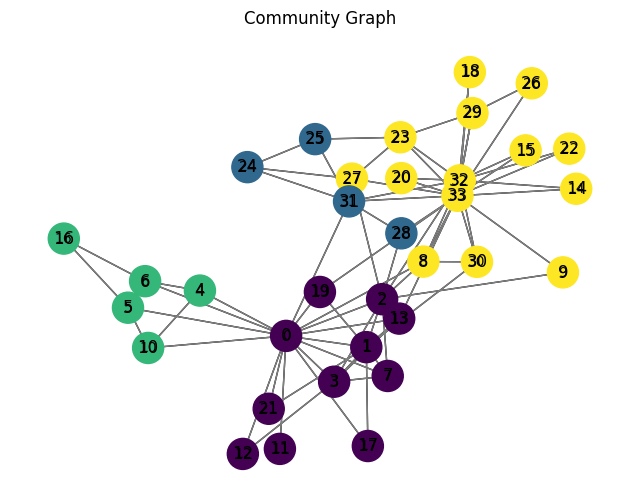

Community 0: Best Node 0
Community 2: Best Node 5
Community 3: Best Node 33
Community 1: Best Node 31


In [70]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

# Create a graph
G = nx.karate_club_graph()

# Apply the Louvain algorithm for community detection
partition = community_louvain.best_partition(G)

# Find the best node to represent each community
best_nodes = {}
for node, community_id in partition.items():
    if community_id not in best_nodes or G.degree[node] > G.degree[best_nodes[community_id]]:
        best_nodes[community_id] = node

# Print the detected communities
communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = [node]
    else:
        communities[community_id].append(node)
for community_id, nodes in communities.items():
    print(f"Community {community_id}: {nodes}")

# Plot the community graph
plt.figure(figsize=(8, 6))
plt.title("Community Graph")
pos = nx.spring_layout(G)
node_colors = [partition[node] for node in G.nodes()]
nx.draw_networkx(G, pos, node_color=node_colors, cmap='viridis', node_size=500)
nx.draw_networkx_labels(G, pos, font_size=10)
nx.draw_networkx_edges(G, pos, edge_color='gray')
plt.axis('off')
plt.show()

# Print the best node for each community
for community_id, node in best_nodes.items():
    print(f"Community {community_id}: Best Node {node}")

# # Print the nodes and their respective communities
# for node, community_id in partition.items():
#     print(f"Node {node}: Community {community_id}")

# 2. Girvan-Newman algorithm (using NetworkX):

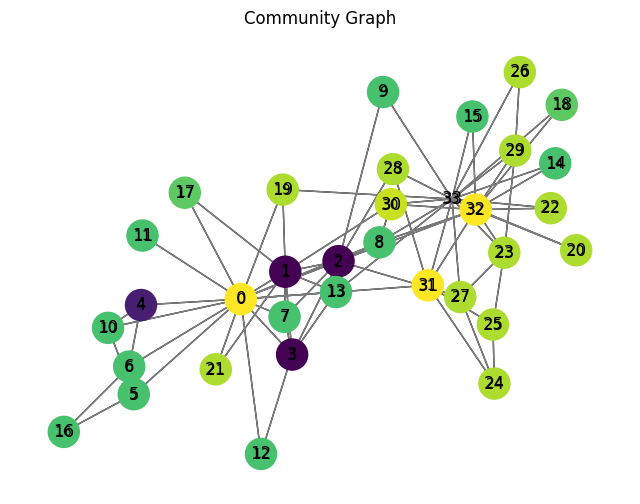

Level 1: Best Node 33
Level 2: Best Node 9
Level 3: Best Node 9
Level 4: Best Node 9
Level 5: Best Node 11
Level 6: Best Node 26
Level 7: Best Node 26
Level 8: Best Node 26
Level 9: Best Node 26
Level 10: Best Node 26
Level 11: Best Node 26
Level 12: Best Node 26
Level 13: Best Node 26
Level 14: Best Node 26
Level 15: Best Node 26
Level 16: Best Node 26
Level 17: Best Node 26
Level 18: Best Node 27
Level 19: Best Node 27
Level 20: Best Node 30
Level 21: Best Node 30
Level 22: Best Node 30
Level 23: Best Node 30
Level 24: Best Node 30
Level 25: Best Node 30
Level 26: Best Node 30
Level 27: Best Node 30
Level 28: Best Node 30
Level 29: Best Node 30
Level 30: Best Node 30
Level 31: Best Node 31
Level 32: Best Node 33
Level 33: Best Node 33


In [68]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.karate_club_graph()

# Apply the Girvan-Newman algorithm for community detection
communities = nx.community.girvan_newman(G)

# Find the best node to represent each community
best_nodes = {}
for level, community in enumerate(communities):
    for comm in community:
        highest_degree = -1
        best_node = None
        for node in comm:
            degree = G.degree[node]
            if degree > highest_degree:
                highest_degree = degree
                best_node = node
        best_nodes[level] = best_node

# Print the detected communities at each level
for level, community in enumerate(communities):
    print(f"Level {level + 1}: {community}")

# Plot the community graph
plt.figure(figsize=(8, 6))
plt.title("Community Graph")
pos = nx.spring_layout(G)
node_colors = [best_nodes.get(node) for node in G.nodes()]
nx.draw_networkx(G, pos, node_color=node_colors, cmap='viridis', node_size=500)
nx.draw_networkx_labels(G, pos, font_size=10)
nx.draw_networkx_edges(G, pos, edge_color='gray')
plt.axis('off')
plt.show()

# Print the best node for each community
for level, node in best_nodes.items():
    print(f"Level {level + 1}: Best Node {node}")

# 3. Infomap algorithm (using the infomap module):

In [55]:
!pip install infomap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.1/263.1 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for infomap: filename=infomap-2.7.1-cp310-cp310-linux_x86_64.whl size=7690306 sha256=498087c4bd9808f036be955874a0476d45412aa5aee9ad120ab0eaa9cc83f287
  Stored in directory: /root/.cache/pip/wheels/e4/01/53/fd7c62079098140cd582b999592b4592c0dad7300cac32b6e1
Successfully built infomap


Community 1: 0
Community 2: 1
Community 3: 2
Community 4: 3
Community 5: 4
Community 6: 5
Community 7: 6
Community 8: 7
Community 9: 8
Community 10: 9
Community 11: 10
Community 12: 11
Community 13: 12
Community 14: 13
Community 15: 14
Community 16: 15
Community 17: 16
Community 18: 17
Community 19: 18
Community 20: 19
Community 21: 20
Community 22: 21
Community 23: 22
Community 24: 23
Community 25: 24
Community 26: 25
Community 27: 26
Community 28: 27
Community 29: 28
Community 30: 29
Community 31: 30
Community 32: 31
Community 33: 32
Community 34: 33


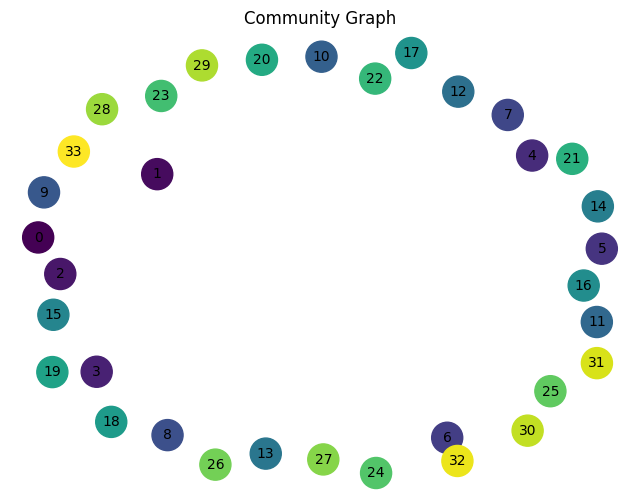

In [64]:
import infomap
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.karate_club_graph()

# Create a network object
network = infomap.Infomap()

# Add edges to the network based on the graph
for edge in G.edges():
    network.addLink(*edge)

# Run the Infomap algorithm
network.run()

# Get the detected communities
communities = list(network.get_modules())

# Print the detected communities
for community_id, community in enumerate(communities):
    print(f"Community {community_id + 1}: {community}")

# Create a graph to visualize the communities
community_graph = nx.Graph()

# Add nodes and edges based on the communities
for node, community_id in enumerate(communities):
    community_graph.add_node(node, community=community_id)
    for neighbor in G.neighbors(node):
        if neighbor != node and communities[neighbor] == community_id:
            community_graph.add_edge(node, neighbor)

# Define the layout and labels for the graph
pos = nx.spring_layout(community_graph)
labels = {node: node for node in community_graph.nodes()}

# Plot the community graph
plt.figure(figsize=(8, 6))
plt.title("Community Graph")
nx.draw_networkx_nodes(community_graph, pos, node_color=list(nx.get_node_attributes(community_graph, "community").values()), cmap='viridis', node_size=500)
nx.draw_networkx_labels(community_graph, pos, labels, font_size=10)
nx.draw_networkx_edges(community_graph, pos, edge_color='gray')
plt.axis('off')
plt.show()

# Print the best node for each community
for community, node in best_nodes.items():
    print(f"Community {community}: Best Node {node}")

# 4. Spectral clustering (using scikit-learn):

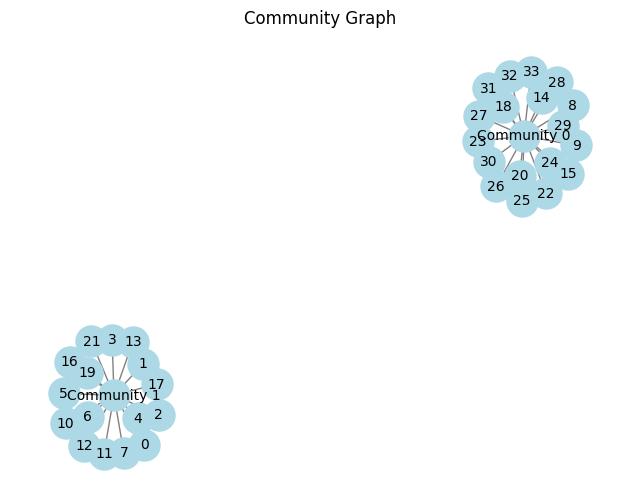

Community 1: Best Node 0
Community 0: Best Node 8
Node 0: Community Community 1
Node 1: Community 0
Node 2: Community 1
Node 3: Community 2
Node 4: Community 3
Node 5: Community 4
Node 6: Community 5
Node 7: Community 6
Node 8: Community 7
Node 9: Community Community 0
Node 10: Community 8
Node 11: Community 9
Node 12: Community 10
Node 13: Community 11
Node 14: Community 12
Node 15: Community 13
Node 16: Community 14
Node 17: Community 15
Node 18: Community 16
Node 19: Community 17
Node 20: Community 18
Node 21: Community 19
Node 22: Community 20
Node 23: Community 21
Node 24: Community 22
Node 25: Community 23
Node 26: Community 24
Node 27: Community 25
Node 28: Community 26
Node 29: Community 27
Node 30: Community 28
Node 31: Community 29
Node 32: Community 30
Node 33: Community 31
Node 34: Community 32
Node 35: Community 33


In [49]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering

# Create a graph
G = nx.karate_club_graph()

# Perform spectral clustering for community detection
spectral = SpectralClustering(n_clusters=2, affinity='precomputed')
labels = spectral.fit_predict(nx.to_numpy_array(G))

# Create a new graph with the communities as nodes
community_graph = nx.Graph()
for i in range(len(labels)):
    community_graph.add_node(f"Community {labels[i]}")
    community_graph.add_edge(f"Community {labels[i]}", i)

# Find the best node to represent each community
best_nodes = {}
for node, label in enumerate(labels):
    if label not in best_nodes:
        best_nodes[label] = node

# Define the layout and labels for the graph
pos = nx.spring_layout(community_graph)
labels = {node: node for node in community_graph.nodes()}

# Draw the community graph
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(community_graph, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_labels(community_graph, pos, labels, font_size=10)
nx.draw_networkx_edges(community_graph, pos, edge_color='gray')
plt.axis('off')
plt.title("Community Graph")
plt.show()

# Print the best node for each community
for community, node in best_nodes.items():
    print(f"Community {community}: Best Node {node}")

# # Print the nodes and their respective communities
# for node, label in enumerate(labels):
#     print(f"Node {node}: Community {label}")

# 5. Label Propagation algorithm (using NetworkX):

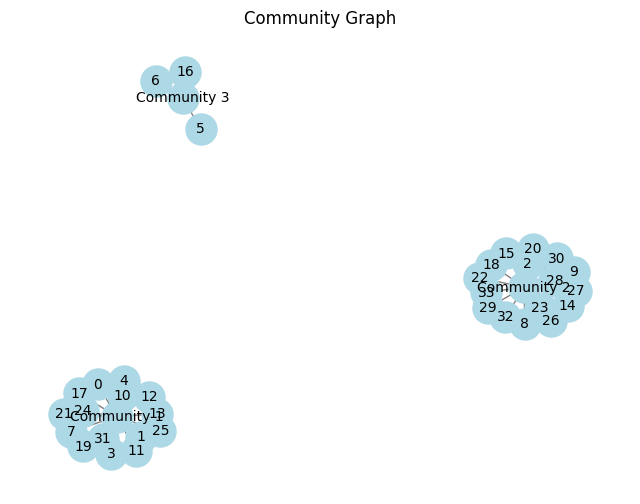

Community 1: Best Node 0
Community 2: Best Node 33
Community 3: Best Node 5
{0, 1, 3, 4, 7, 10, 11, 12, 13, 17, 19, 21, 24, 25, 31}
{32, 33, 2, 8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 28, 29, 30}
{16, 5, 6}


In [50]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.karate_club_graph()

# Apply the Label Propagation algorithm for community detection
communities = nx.algorithms.community.label_propagation_communities(G)

# Create a new graph with the communities as nodes
community_graph = nx.Graph()
for i, community in enumerate(communities):
    community_graph.add_node(f"Community {i+1}")
    for node in community:
        community_graph.add_edge(f"Community {i+1}", node)

# Find the best node to represent each community
best_nodes = {}
for community, nodes in enumerate(communities):
    best_node = None
    highest_degree = -1
    for node in nodes:
        degree = G.degree[node]
        if degree > highest_degree:
            highest_degree = degree
            best_node = node
    best_nodes[community] = best_node

# Define the layout and labels for the graph
pos = nx.spring_layout(community_graph)
labels = {node: node for node in community_graph.nodes()}

# Draw the community graph
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(community_graph, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_labels(community_graph, pos, labels, font_size=10)
nx.draw_networkx_edges(community_graph, pos, edge_color='gray')
plt.axis('off')
plt.title("Community Graph")
plt.show()

# Print the best node for each community
for community, node in best_nodes.items():
    print(f"Community {community+1}: Best Node {node}")

# Print the detected communities
for community in communities:
    print(community)

# 6. Hierarchical clustering algorithms:

<ipython-input-52-fe93c2b91b2d>:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = hierarchy.linkage(dist_matrix, method='average')


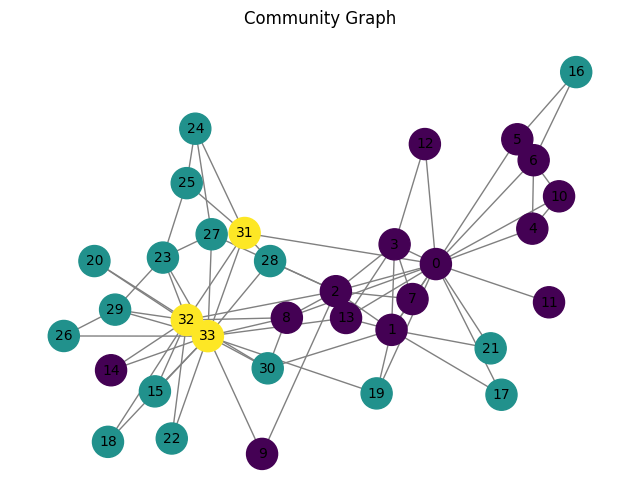

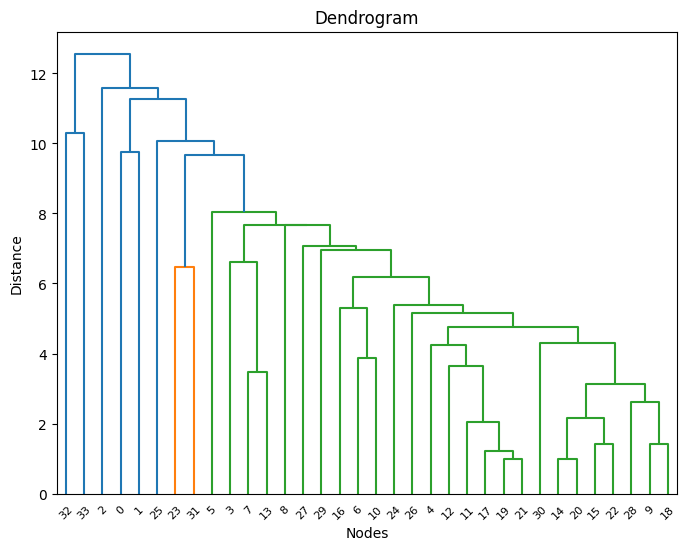

Community 0: Best Node 0
Community 1: Best Node 33
Community 2: Best Node 5


In [52]:
import networkx as nx
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

# Create a graph
G = nx.karate_club_graph()

# Convert the graph to a distance matrix
dist_matrix = nx.to_numpy_array(G)

# Perform hierarchical clustering
linkage_matrix = hierarchy.linkage(dist_matrix, method='average')

# Define the layout and labels for the graph
pos = nx.spring_layout(G)
labels = {node: node for node in G.nodes()}

# Assign community labels using the Louvain algorithm
communities = nx.algorithms.community.label_propagation.label_propagation_communities(G)
community_dict = {node: i for i, comm in enumerate(communities) for node in comm}

# Find the best node to represent each community
best_nodes = {}
for community, nodes in enumerate(communities):
    best_node = None
    highest_degree = -1
    for node in nodes:
        degree = G.degree[node]
        if degree > highest_degree:
            highest_degree = degree
            best_node = node
    best_nodes[community] = best_node

# Plot the community graph
plt.figure(figsize=(8, 6))
plt.title("Community Graph")
nx.draw_networkx_nodes(G, pos, node_color=list(community_dict.values()), cmap='viridis', node_size=500)
nx.draw_networkx_labels(G, pos, labels, font_size=10)
nx.draw_networkx_edges(G, pos, edge_color='gray')
plt.axis('off')
plt.show()

# Plot the dendrogram
plt.figure(figsize=(8, 6))
plt.title("Dendrogram")
dendrogram = hierarchy.dendrogram(linkage_matrix)
plt.xlabel("Nodes")
plt.ylabel("Distance")
plt.show()

# Print the best node for each community
for community, node in best_nodes.items():
    print(f"Community {community}: Best Node {node}")